# 第二章 预备知识

参考文档:

https://pytorch.apachecn.org/docs/1.4/ 中文版

https://pytorch.org/docs/stable/tensors.html 英文版

https://tangshusen.me/Dive-into-DL-PyTorch/#/chapter02_prerequisite/2.2_tensor 动手学深度学习

2.2 数据操作

“tensor”张量可以看作是一个多维数组，标量可以看作0维张量，向量可以看作一维张量，矩阵可以看作是二维张量

In [1]:
import torch


In [5]:
x=torch.empty(5,3)#创建5*3的未初始化的Tensor
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [6]:
# 创建5*3的随机初始化的Tensor
x=torch.rand(5,3)
x

tensor([[0.9533, 0.8526, 0.9451],
        [0.7231, 0.5055, 0.9664],
        [0.7434, 0.7296, 0.8010],
        [0.0388, 0.6296, 0.7505],
        [0.9231, 0.9859, 0.8056]])

In [7]:
# 创建5*3的long型全0的Tensor
x=torch.zeros(5,3,dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [8]:
# 根据数据创建
x=torch.tensor([5.5,3])
x

tensor([5.5000, 3.0000])

In [11]:
# 通过现有的Tensor创建，默认重用输入Tensor的一些属性，比如：数据类型,除非自定义数据类型

x=x.new_ones(5,3,dtype=torch.float64)#返回的tensor默认具有相同的torch.dtype和torch.device
print(x)

#自定义数据类型
x=torch.randn_like(x,dtype=torch.float) #指定新的数据类型
print(x.size())#返回的torch.Size是一个tuple，支持所有tuple的操作B
print(x.shape)


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
torch.Size([5, 3])
torch.Size([5, 3])


### 创建Tensor的函数

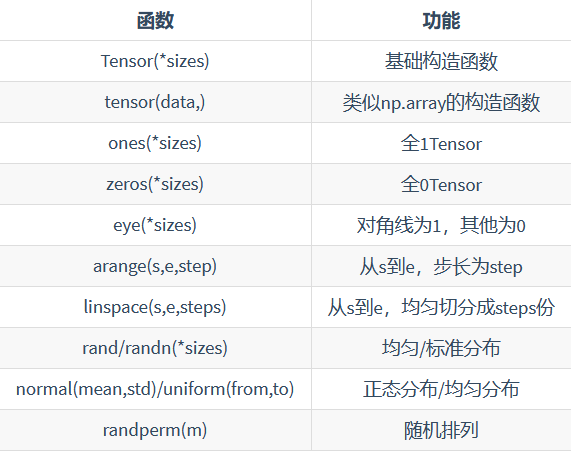
可以在创建时指定数据类型dtype和存放device(cpu/gpu)

## 2.2.2 操作

### 算术操作 

* 加法形式一

In [15]:
y=torch.rand(5,3)
print(x+y)

tensor([[ 0.9314,  0.8859,  0.4076],
        [ 0.2206,  3.4071,  0.6012],
        [-0.7371,  1.4703,  1.1293],
        [-0.0394,  1.0975,  1.8843],
        [-0.7191,  0.2023, -0.6534]])


* 加法形式二

In [16]:
print(torch.add(x,y))

tensor([[ 0.9314,  0.8859,  0.4076],
        [ 0.2206,  3.4071,  0.6012],
        [-0.7371,  1.4703,  1.1293],
        [-0.0394,  1.0975,  1.8843],
        [-0.7191,  0.2023, -0.6534]])


In [18]:
# 指定输出
result=torch.empty(5,3)
torch.add(x,y,out=result)
print(result)

tensor([[ 0.9314,  0.8859,  0.4076],
        [ 0.2206,  3.4071,  0.6012],
        [-0.7371,  1.4703,  1.1293],
        [-0.0394,  1.0975,  1.8843],
        [-0.7191,  0.2023, -0.6534]])


* 加法形式三、inplace

In [19]:
#adds x to y
y.add_(x)
print(y)

tensor([[ 0.9314,  0.8859,  0.4076],
        [ 0.2206,  3.4071,  0.6012],
        [-0.7371,  1.4703,  1.1293],
        [-0.0394,  1.0975,  1.8843],
        [-0.7191,  0.2023, -0.6534]])


### 索引 

使用类似NumPy的索引来访问Tensor的一部分，索引出的结果与原数据共享内存。

In [24]:
x=torch.rand(5,3)
print("操作之前x:{}".format(x[0,:]))
y=x[0,:]
y+=1
print("y:{}".format(y))
print("操作之后x:{}".format(x[0,:]))


操作之前x:tensor([0.3368, 0.8199, 0.4799])
y:tensor([1.3368, 1.8199, 1.4799])
操作之后x:tensor([1.3368, 1.8199, 1.4799])


除了索引选择数据，PyTorch提供了一些高级的选择函数：
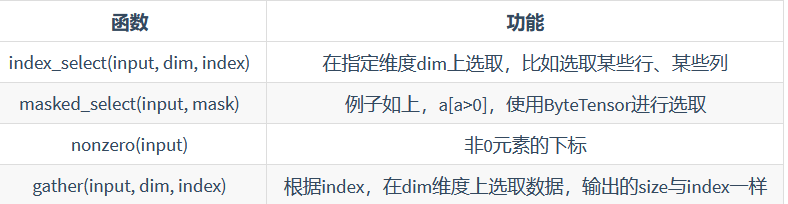

### 改变形状 

用view()改变Tensor的形状：

注：虽然view返回的Tensor与源Tensor是共享data的，但是依然是一个新的Tensor（因为Tensor除了

包含data外还有一些其他属性），二者id（内存地址）并不一致。

In [28]:
y=x.view(15)
z=x.view(-1,5)  #-1所指的维度可以根据其他维度的值推出,指的是未知
print(x.size(),y.size(),z.size())

torch.Size([5, 3]) torch.Size([15]) torch.Size([3, 5])


view()返回的新Tensor与源Tensor虽然有不同的size，但是共享data。即更改其中的一个，另外一个也会跟着改变。(view仅仅是改变对这个张量的观察角度，内部数据并未改变)

In [31]:
x+=1
print(x)
print(y)

tensor([[4.3368, 4.8199, 4.4799],
        [3.1763, 3.8188, 3.9973],
        [3.3867, 3.5963, 3.0803],
        [3.4589, 3.6888, 3.6477],
        [3.2889, 3.7694, 3.1692]])
tensor([4.3368, 4.8199, 4.4799, 3.1763, 3.8188, 3.9973, 3.3867, 3.5963, 3.0803,
        3.4589, 3.6888, 3.6477, 3.2889, 3.7694, 3.1692])


改变形状时，返回新的副本：
1、reshape()
2、使用clone()创造一个副本，然后再使用view

In [33]:
# 使用clone会被记录在计算图中，即梯度回传到副本时也会传到源Tensor
x_cp=x.clone().view(15)
x-=1
print(x)
print(x_cp)

tensor([[2.3368, 2.8199, 2.4799],
        [1.1763, 1.8188, 1.9973],
        [1.3867, 1.5963, 1.0803],
        [1.4589, 1.6888, 1.6477],
        [1.2889, 1.7694, 1.1692]])
tensor([3.3368, 3.8199, 3.4799, 2.1763, 2.8188, 2.9973, 2.3867, 2.5963, 2.0803,
        2.4589, 2.6888, 2.6477, 2.2889, 2.7694, 2.1692])


In [38]:
# item()将一个标量Tensor转换成一个Python number
x=torch.randn(1)
print(x)
print(x.item())


tensor([1.9050])
1.9050220251083374


### 线性代数函数

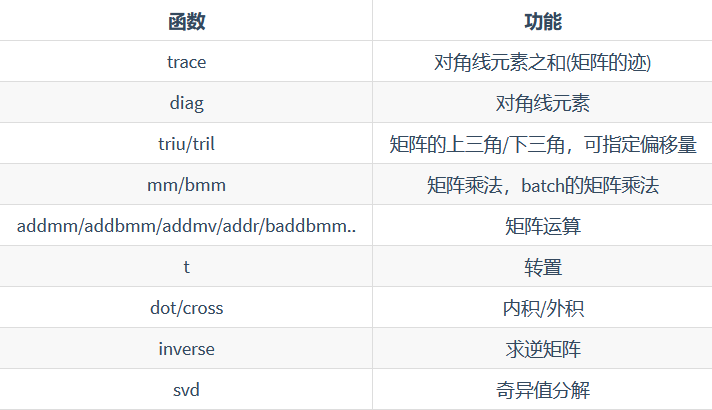

### 2.2.3 广播机制

当对两个形状不同的Tensor按元素运算时，可能会出发广播机制：先适当复制元素使这两个Tensor形状相同后再按元素运算：

In [39]:
x=torch.arange(1,3).view(1,2)
print(x)

y=torch.arange(1,4).view(3,1)
print(y)

print(x+y)

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


### 2.2.4 运算的内存开销

索引操作不会开辟新内存，y=x+y会开新内存，将Y指向新内存。如果两个实例的ID一致，那么它们对应的内存地址相同。

In [43]:
x=torch.tensor([1,2])#指定数据创建张量
y=torch.tensor([3,4])
id_before=id(y)
print("id_before{}".format(id_before))
y=y+x
print("id:{}".format(id(y)))
print(id_before==id(y))

id_before1439444732408
tensor([1, 2])
id:1439444732728
False


如果将指定结果到原来y的内存，使用前面的索引进行替换操作，把x+y的结果通过[:]写进y对应的内存中

In [44]:
x=torch.tensor([1,2])
y=torch.tensor([3,4])
id_before=id(y)
y[:]=y+x
print(id_before==id(y))

True


我们还可以使用运算符全名函数中的out参数或者自加运算符+=(也即add_())达到上述效果，例如

torch.add(x, y, out=y)和y += x(y.add_(x))。

In [47]:
x=torch.tensor([1,2])
y=torch.tensor([3,4])
id_before=id(y)
# torch.add(x,y,out=y)
# y+=x
y.add_(x)
print(id_before==id(y))

True


### 2.2.5 Tensor和NumPy相互转换

用numpy()和from_numpy()将Tensor和NumPy中的数组相互转换。但是需要注意的一点是： 这两个函
数所产生的的Tensor和NumPy中的数组共享相同的内存（所以他们之间的转换很快），改变其中一个
时另一个也会改变！！！

* 还有一个常用的将NumPy中的array转换成Tensor的方法就是torch.tensor(), 需要注意的是，此方法总是会进行数据拷贝（就会消耗更多的时间和空间），所以返回的Tensor和原来的数据不再共享内存。

* 所有在CPU上的Tensor（除了CharTensor）都支持与NumPy数组相互转换。

#### Tensor转NumPy 

In [48]:
#numpy()将Tensor转换成Numpy数组：共享内存
a=torch.ones(5)
b=a.numpy()
print(a,b)

a+=1
print(a,b)
b+=1
print(a,b)

tensor([1., 1., 1., 1., 1.]) [1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2.]
tensor([3., 3., 3., 3., 3.]) [3. 3. 3. 3. 3.]


#### Numpy数组转Tensor 

使用from_numpy()将Numpy数组转换成Tensor:

In [49]:
#共享内存
import numpy as np 
a=np.ones(5)
b=torch.from_numpy(a)
print(a,b)

a+=1
print(a,b)
b+=1
print(a,b)

[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[3. 3. 3. 3. 3.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)


In [50]:
# 不共享内存
a=np.ones(5)
b=torch.tensor(a)
print(a,b)

a+=1
print(a,b)
b+=1
print(a,b)

[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


#### 2.2.6 Tensor on GPU 

用方法to()可以将Tensor在CPU和GPU（需要硬件支持）之间相互移动。

<!-- 以下代码只有在PyTorch GPU版本上才会执行 -->

if torch.cuda.is_available():
    
    device = torch.device("cuda")          # GPU
    y = torch.ones_like(x, device=device)  # 直接创建一个在GPU上的Tensor
    x = x.to(device)                       # 等价于 .to("cuda")
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # to()还可以同时更改数据类型